# Recidivism Project (Exploratory Data Analysis & Predictive Analysis)
#### by Julia Fangman 

### Step 1. Data Acquisition (Original Data)

In [2]:
import pandas as pd 

# Load the dataset
url = "/Users/juliafangman/Documents/Capstone-Project/recidivism_full.csv"
data = pd.read_csv(url)

### 2. Cleaning Original Data

In [3]:
import pandas as pd
import numpy as np

# Load the CSV file
csv_file_path = '/Users/juliafangman/Downloads/recidivism_full.csv'
df = pd.read_csv(csv_file_path)

# List of columns to keep
columns_to_keep = [
    'ID', 'Gender', 'Race', 'Age_at_Release', 'Gang_Affiliated', 'Education_Level', 
    'Dependents', 'Prison_Offense', 'Prison_Years', 'Prior_Arrest_Episodes_Felony', 
    'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent', 
    'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug', 
    'Prior_Arrest_Episodes_PPViolationCharges', 'Prior_Arrest_Episodes_DVCharges', 
    'Prior_Arrest_Episodes_GunCharges', 'Prior_Conviction_Episodes_Felony', 
    'Prior_Conviction_Episodes_Misd', 'Prior_Conviction_Episodes_Viol', 
    'Prior_Conviction_Episodes_Prop', 'Prior_Conviction_Episodes_Drug', 
    'Prior_Conviction_Episodes_PPViolationCharges', 'Prior_Conviction_Episodes_DomesticViolenceCharges', 
    'Prior_Conviction_Episodes_GunCharges', 'Percent_Days_Employed', 'Jobs_Per_Year', 
    'Employment_Exempt', 'Recidivism_Within_3years', 'Recidivism_Arrest_Year1', 
    'Recidivism_Arrest_Year2', 'Recidivism_Arrest_Year3'
]

# Exclude columns not in the dataset
columns_to_keep = [col for col in columns_to_keep if col in df.columns]

# Select columns to keep
df = df[columns_to_keep]

# Replace missing values in numeric columns with NaN and categorical columns with 'Unknown'
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_columns] = df[numeric_columns].fillna(np.nan)
df = df.fillna('Unknown')

# Check if there are any remaining missing values
print("Number of missing values in each column after cleaning:")
print(df.isnull().sum())

# Replace "3 or more" with "3+"
df['Dependents'] = df['Dependents'].replace('3 or more', '3+')

# Columns to transform with "x or more" to "x+"
columns_to_transform = ['Prior_Conviction_Episodes_Drug', 'Prior_Conviction_Episodes_Prop', 'Prior_Conviction_Episodes_Misd',
                       'Prior_Conviction_Episodes_Felony', 'Prior_Arrest_Episodes_PPViolationCharges',
                       'Prior_Arrest_Episodes_Drug', 'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Violent',
                       'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Felony']


# Define a function to replace "x or more" with "x+"
def replace_or_more(value):
   if ' or more' in value:
       return value.replace(' or more', '+')
   else:
       return value

# Apply the function to each column
for col in columns_to_transform:
   df[col] = df[col].apply(replace_or_more)

# Define a mapping dictionary for "Prison Years"
duration_mapping = {
   'More than 3 years': '3+ years',
   '1-2 years': '1-2 years',
   'Less than 1 year': '<1 year',
   'Greater than 2 to 3 years': '3+ years'
}

# Apply the mapping to "Prison Years"
df['Prison_Years'] = df['Prison_Years'].replace(duration_mapping)

# Define a mapping dictionary for "Education Level"
education_mapping = {
   'At least some college': 'Some College',
   'Less than HS diploma': '< HS Diploma',
   'High School Diploma': 'High School Diploma'
}

# Apply the mapping to "Education Level"
df['Education_Level'] = df['Education_Level'].replace(education_mapping)

# Columns to convert from string representations of boolean to actual boolean and then to integers
columns_to_convert = ['Gang_Affiliated', 'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges',
                      'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_PPViolationCharges',
                      'Prior_Conviction_Episodes_DomesticViolenceCharges', 'Prior_Conviction_Episodes_GunCharges',
                      'Employment_Exempt', 'Recidivism_Within_3years', 'Recidivism_Arrest_Year1',
                      'Recidivism_Arrest_Year2', 'Recidivism_Arrest_Year3']

# Function to convert string representations to boolean
def str_to_bool(value):
    if isinstance(value, str):
        return value.lower() == 'true'
    else:
        return bool(value)

# Apply conversion for each column
for col in columns_to_convert:
    df[col] = df[col].apply(str_to_bool).astype(int)

# Convert boolean-like values to integers (0 or 1)
for col in columns_to_convert:
    df[col] = df[col].fillna(-1)  # Replace NaN with -1 or any other appropriate value
    df[col] = df[col].astype(int)

# Save the cleaned DataFrame to a new CSV file
df.to_csv('/Users/juliafangman/Documents/Capstone-Project-2024/cleaned_recidivism_data.csv', index=False)

print("Cleaned data saved to cleaned_recidivism_data.csv")

Number of missing values in each column after cleaning:
ID                                                   0
Gender                                               0
Race                                                 0
Age_at_Release                                       0
Gang_Affiliated                                      0
Education_Level                                      0
Dependents                                           0
Prison_Offense                                       0
Prison_Years                                         0
Prior_Arrest_Episodes_Felony                         0
Prior_Arrest_Episodes_Misd                           0
Prior_Arrest_Episodes_Violent                        0
Prior_Arrest_Episodes_Property                       0
Prior_Arrest_Episodes_Drug                           0
Prior_Arrest_Episodes_PPViolationCharges             0
Prior_Arrest_Episodes_DVCharges                      0
Prior_Arrest_Episodes_GunCharges                     0
Prior_Con

### 3. Data Acquisition (Cleaned Data)

In [4]:
import pandas as pd

# Load the dataset
url = "/Users/juliafangman/Documents/Capstone-Project/cleaned_recidivism_data.csv"
data = pd.read_csv(url)

### 4. Initial Data Inspection 

In [5]:
# Check the dimensions of the dataset
print("Dataset dimensions (rows, columns):")
data.head()

Dataset dimensions (rows, columns):


,ID,Gender,Race,Age_at_Release,Gang_Affiliated,Education_Level,Dependents,Prison_Offense,Prison_Years,Prior_Arrest_Episodes_Felony,...,Prior_Conviction_Episodes_Drug,Prior_Conviction_Episodes_PPViolationCharges,Prior_Conviction_Episodes_DomesticViolenceCharges,Prior_Conviction_Episodes_GunCharges,Percent_Days_Employed,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3
0,1,M,BLACK,43-47,0,Some College,3+,Drug,3+ years,6,...,2+,0,0,0,0.488562092,0,0,0,0,0
1,2,M,BLACK,33-37,0,< HS Diploma,1,Violent/Non-Sex,3+ years,7,...,2+,1,1,1,0.425233645,0,1,0,0,1
2,3,M,BLACK,48 or older,0,Some College,3+,Drug,1-2 years,6,...,2+,0,1,0,0.0,0,1,0,1,0
3,4,M,WHITE,38-42,0,< HS Diploma,1,Property,1-2 years,8,...,2+,0,0,0,1.0,0,0,0,0,0
4,5,M,WHITE,33-37,0,< HS Diploma,3+,Violent/Non-Sex,1-2 years,4,...,1,0,0,0,0.203562341,0,1,1,0,0


### 5. Initial Descriptive Statistics

In [6]:
# Summary statistics for numerical columns
print("Summary statistics for numerical columns:")
print(data.describe())

Summary statistics for numerical columns:
                 ID  Gang_Affiliated  Prior_Arrest_Episodes_DVCharges  \
count  25835.000000     25835.000000                     25835.000000   
mean   13314.004838         0.152429                         0.165202   
std     7722.206327         0.359443                         0.371370   
min        1.000000         0.000000                         0.000000   
25%     6626.500000         0.000000                         0.000000   
50%    13270.000000         0.000000                         0.000000   
75%    20021.500000         0.000000                         0.000000   
max    26761.000000         1.000000                         1.000000   

       Prior_Arrest_Episodes_GunCharges  Prior_Conviction_Episodes_Viol  \
count                      25835.000000                    25835.000000   
mean                           0.264177                        0.324676   
std                            0.440902                        0.468263   


### 6. Initial Data Distribution for Numerical Columns & Categorical Columns

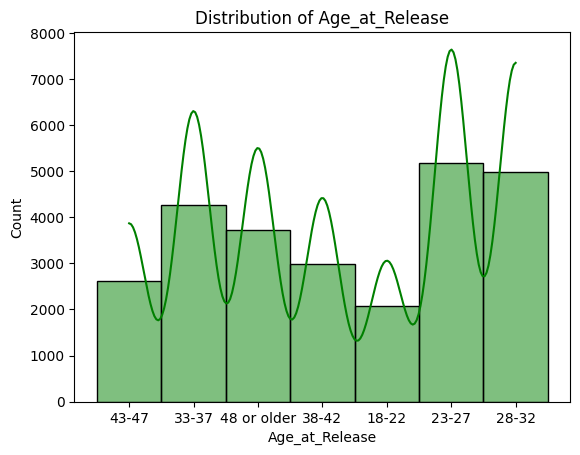

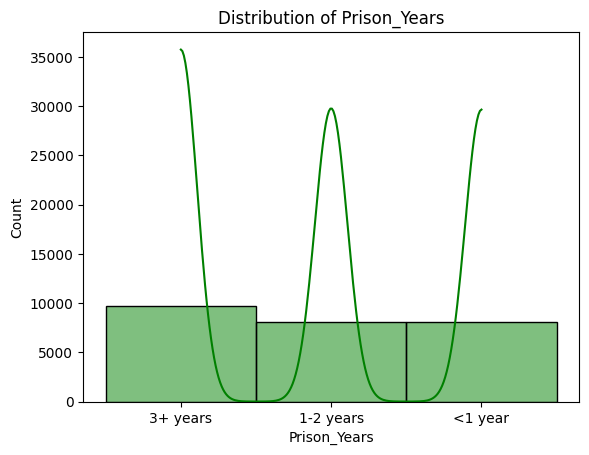

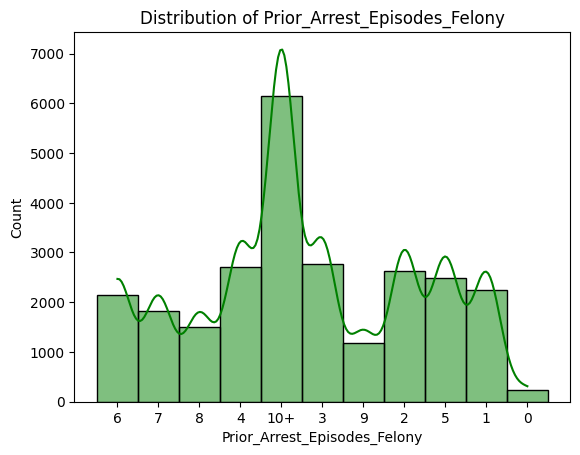

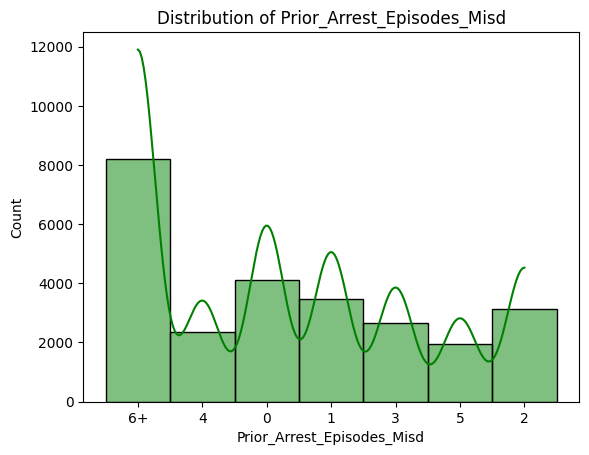

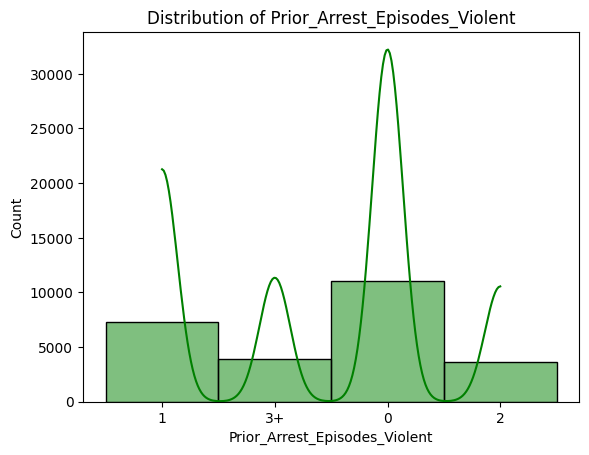

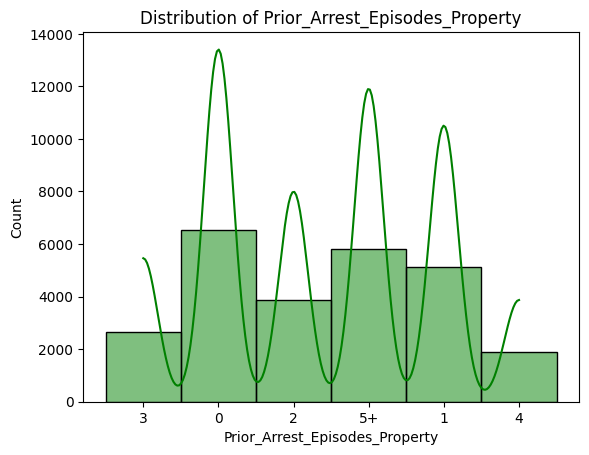

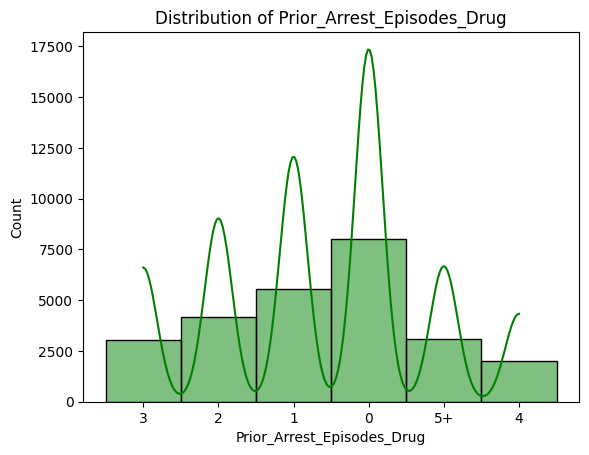

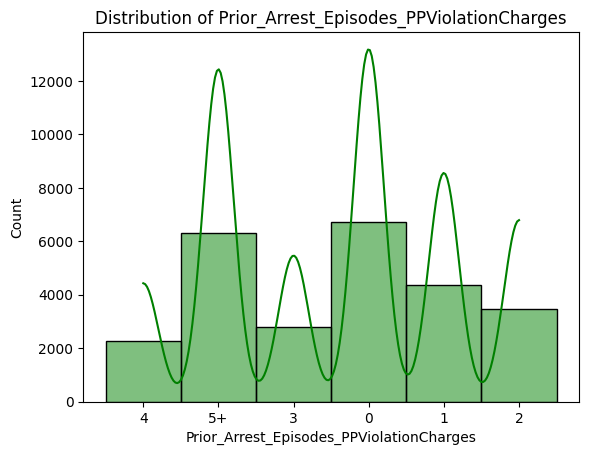

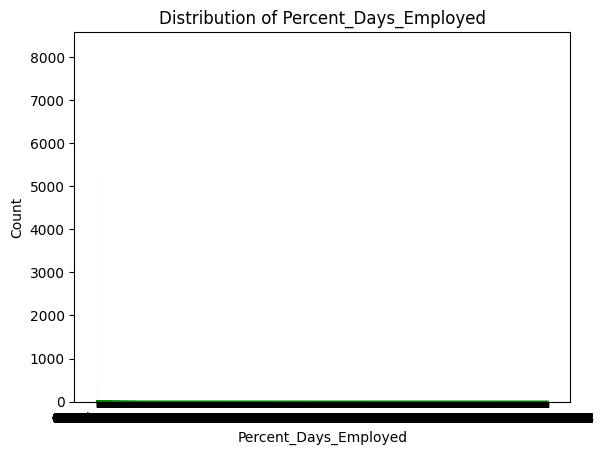

/var/folders/d5/skky3m813435ws6txfybb5780000gn/T/ipykernel_41691/2102088000.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='Blues')  # Categorical columns are blue


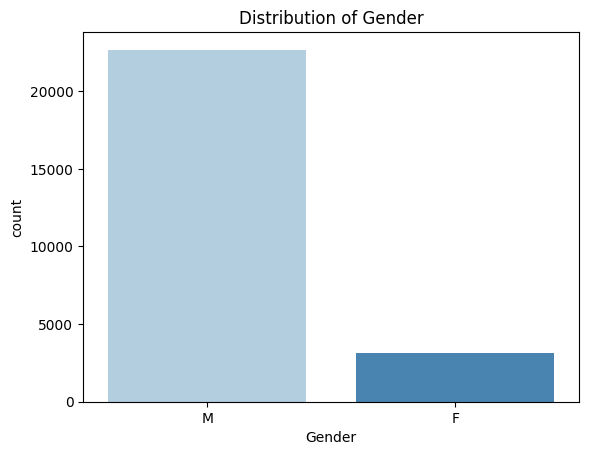

/var/folders/d5/skky3m813435ws6txfybb5780000gn/T/ipykernel_41691/2102088000.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='Blues')  # Categorical columns are blue


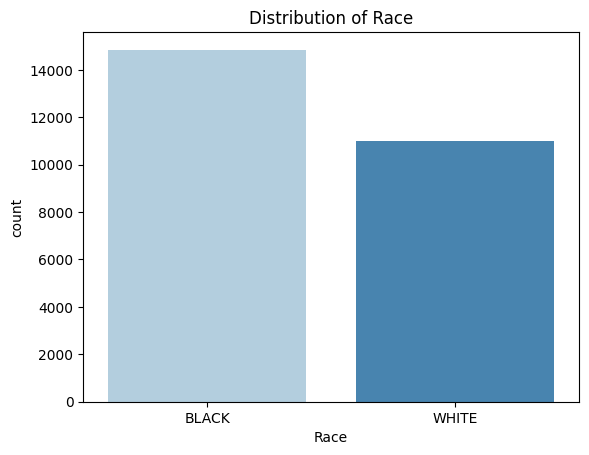

/var/folders/d5/skky3m813435ws6txfybb5780000gn/T/ipykernel_41691/2102088000.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='Blues')  # Categorical columns are blue


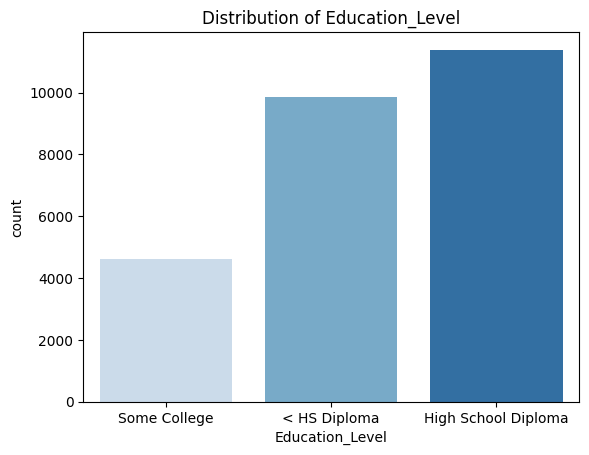

/var/folders/d5/skky3m813435ws6txfybb5780000gn/T/ipykernel_41691/2102088000.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='Blues')  # Categorical columns are blue


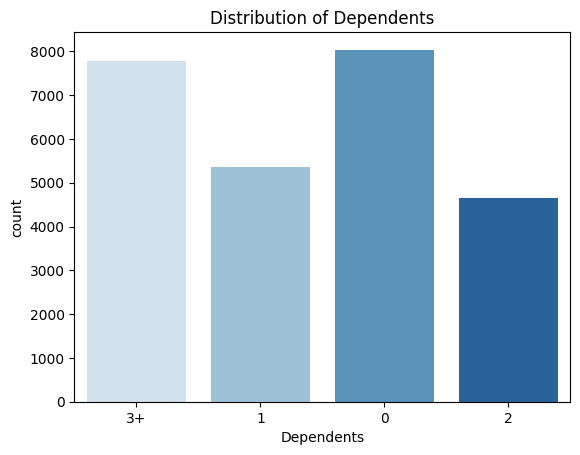

/var/folders/d5/skky3m813435ws6txfybb5780000gn/T/ipykernel_41691/2102088000.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='Blues')  # Categorical columns are blue


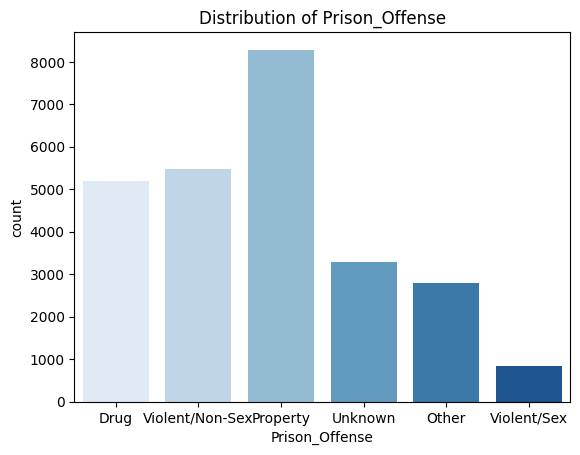

/var/folders/d5/skky3m813435ws6txfybb5780000gn/T/ipykernel_41691/2102088000.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='pink')  # Boolean columns are pink


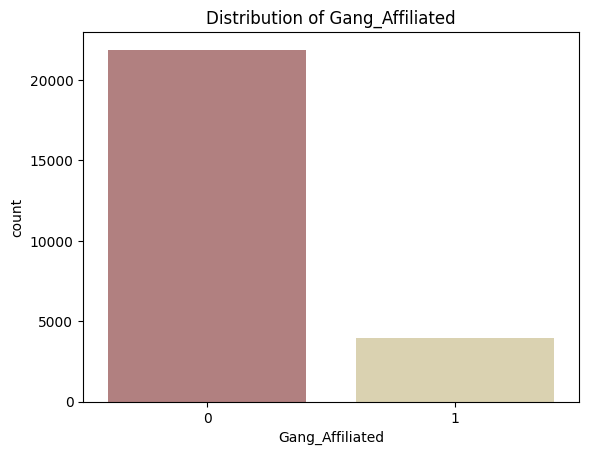

/var/folders/d5/skky3m813435ws6txfybb5780000gn/T/ipykernel_41691/2102088000.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='pink')  # Boolean columns are pink


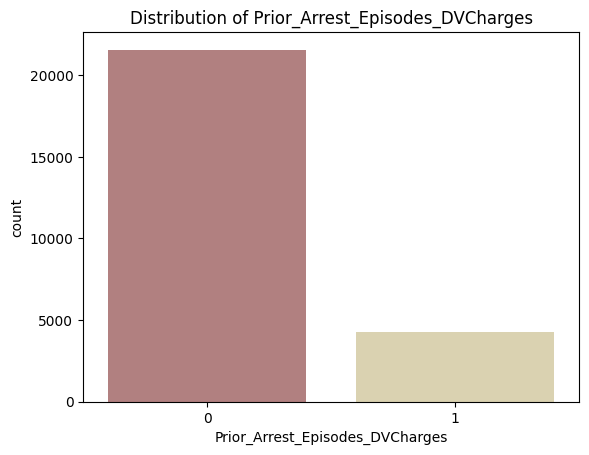

/var/folders/d5/skky3m813435ws6txfybb5780000gn/T/ipykernel_41691/2102088000.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='pink')  # Boolean columns are pink


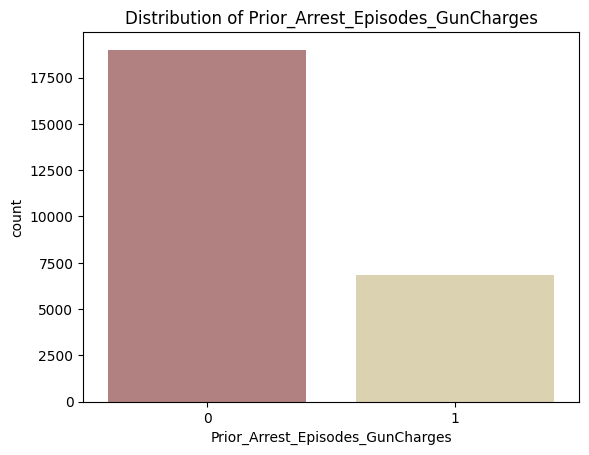

/var/folders/d5/skky3m813435ws6txfybb5780000gn/T/ipykernel_41691/2102088000.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='pink')  # Boolean columns are pink


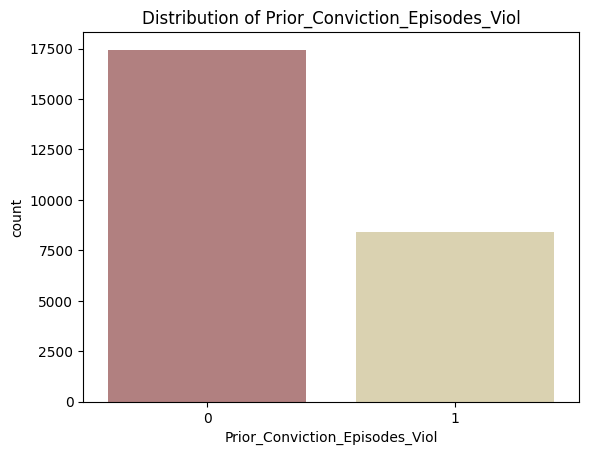

/var/folders/d5/skky3m813435ws6txfybb5780000gn/T/ipykernel_41691/2102088000.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='pink')  # Boolean columns are pink


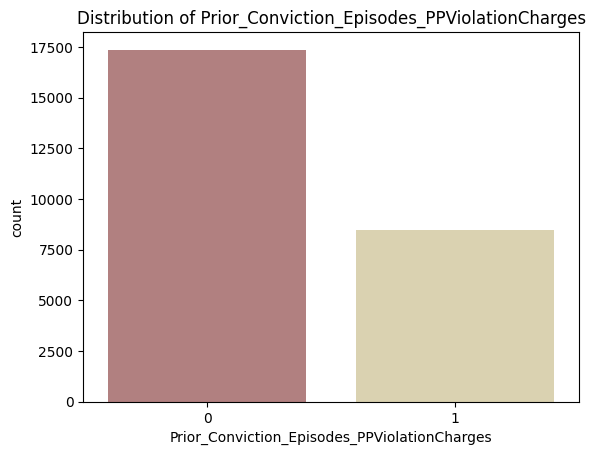

/var/folders/d5/skky3m813435ws6txfybb5780000gn/T/ipykernel_41691/2102088000.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='pink')  # Boolean columns are pink


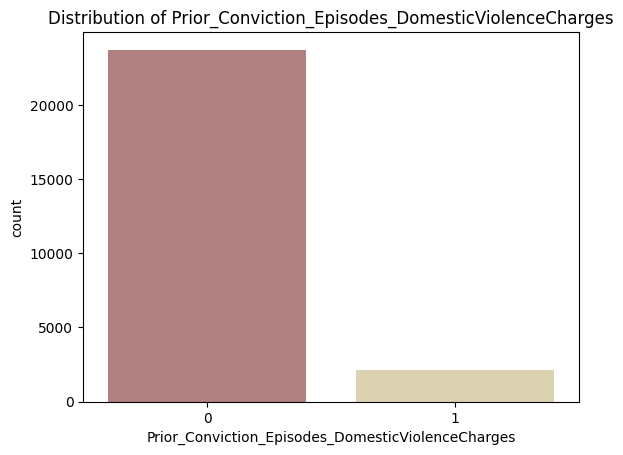

/var/folders/d5/skky3m813435ws6txfybb5780000gn/T/ipykernel_41691/2102088000.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='pink')  # Boolean columns are pink


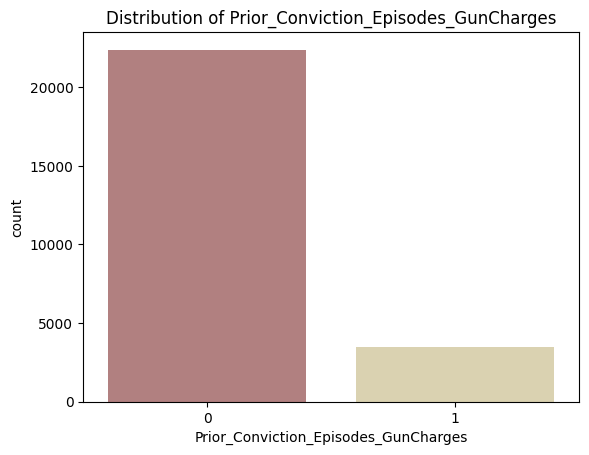

/var/folders/d5/skky3m813435ws6txfybb5780000gn/T/ipykernel_41691/2102088000.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='pink')  # Boolean columns are pink


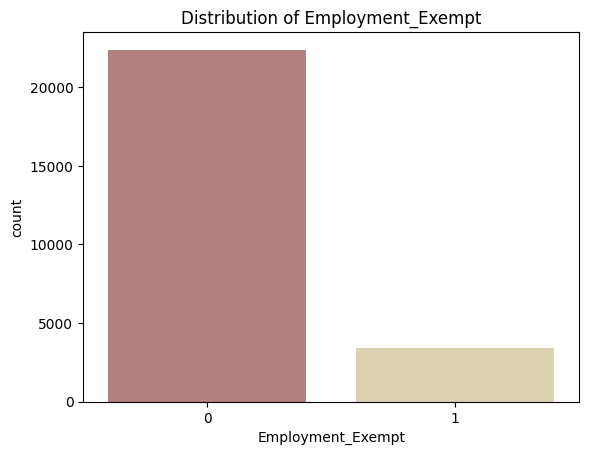

/var/folders/d5/skky3m813435ws6txfybb5780000gn/T/ipykernel_41691/2102088000.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='pink')  # Boolean columns are pink


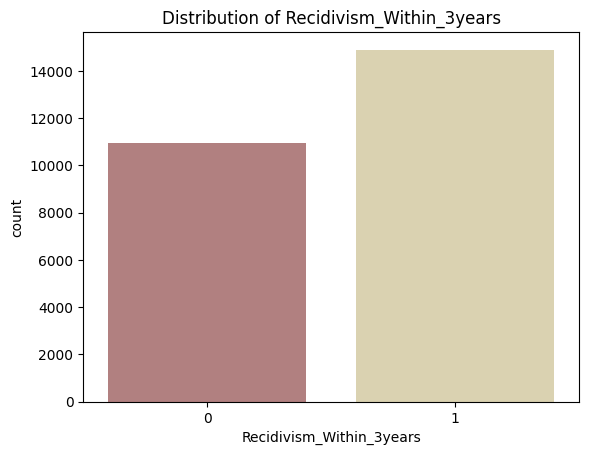

/var/folders/d5/skky3m813435ws6txfybb5780000gn/T/ipykernel_41691/2102088000.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='pink')  # Boolean columns are pink


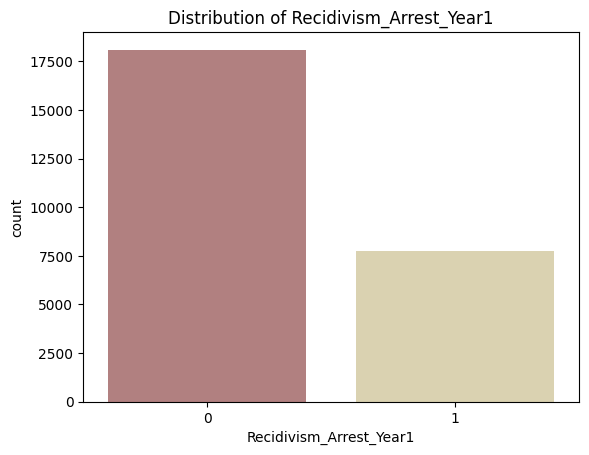

/var/folders/d5/skky3m813435ws6txfybb5780000gn/T/ipykernel_41691/2102088000.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='pink')  # Boolean columns are pink


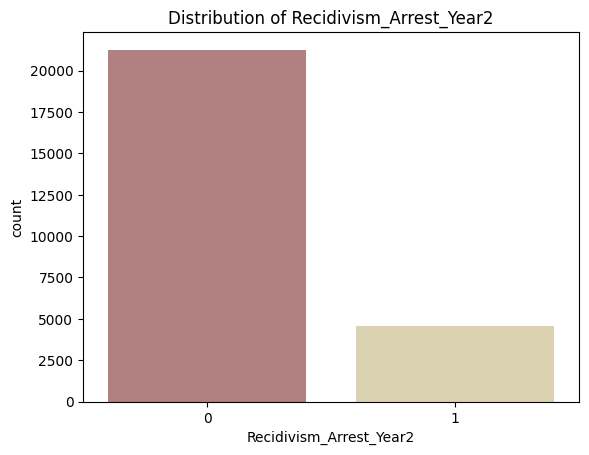

/var/folders/d5/skky3m813435ws6txfybb5780000gn/T/ipykernel_41691/2102088000.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='pink')  # Boolean columns are pink


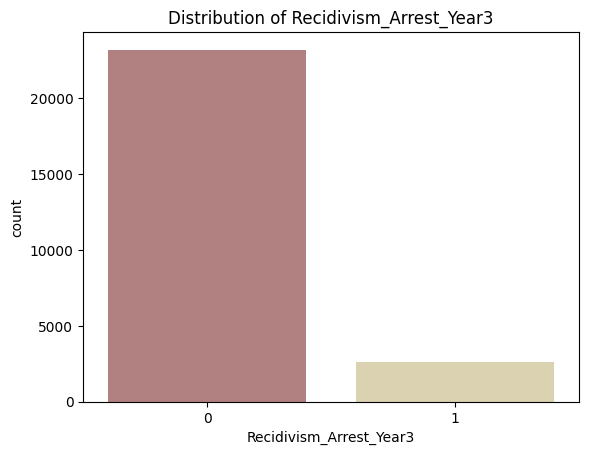

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initial Descriptive Statistics
numerical_columns = ['Age_at_Release', 'Prison_Years', 'Prior_Arrest_Episodes_Felony', 'Prior_Arrest_Episodes_Misd', 
                     'Prior_Arrest_Episodes_Violent', 'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug',
                     'Prior_Arrest_Episodes_PPViolationCharges', 'Percent_Days_Employed']

categorical_columns = ['Gender', 'Race', 'Education_Level', 'Dependents', 'Prison_Offense']

boolean_columns = ['Gang_Affiliated', 'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges', 
                   'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_PPViolationCharges', 
                   'Prior_Conviction_Episodes_DomesticViolenceCharges', 'Prior_Conviction_Episodes_GunCharges', 
                   'Employment_Exempt', 'Recidivism_Within_3years', 'Recidivism_Arrest_Year1', 
                   'Recidivism_Arrest_Year2', 'Recidivism_Arrest_Year3']


# Data Distribution for Numerical Columns
for column in numerical_columns:
    plt.figure()
    sns.histplot(data[column], kde=True, color='green')  # Numerical columns are green
    plt.title(f'Distribution of {column}')
    plt.show()

# Data Distribution for Categorical Columns
for column in categorical_columns:
    plt.figure()
    sns.countplot(x=data[column], palette='Blues')  # Categorical columns are blue
    plt.title(f'Distribution of {column}')
    plt.show()

# Data Distribution for Boolean Columns
for column in boolean_columns:
    plt.figure()
    sns.countplot(x=data[column], palette='pink')  # Boolean columns are pink
    plt.title(f'Distribution of {column}')
    plt.show()

### 6. Visualizations w/ Storytelling and Presentation

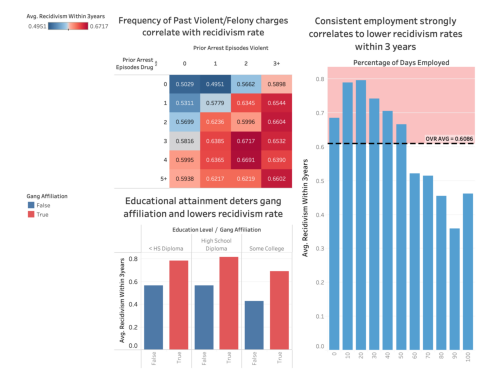

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('/Users/juliafangman/Desktop/recidivism_tableau.png')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes ticks
plt.show()


The above three charts look at various features of the data and their implications on recidivism. Figure 1A shows a heat map that correlates the count of prior violence and drug arrests to average recidivism. As indicated by the blue to red diagonal shift, increasing occurences of past offenses of either drug or violent charges showed an increase in the average occurence of recidivism within 3 years. This data is expected, and shows that individuals who repeatedely recidivize are increasingly more likely to recidivize again. Figure 1B (below) shows how recidivism, gang affiliation, and education level are correlated. As individuals achieved higher educational levels, their likelihood to be gang affiliated decreased as well as their likelihood to recidivize. Similarly, likelihood to recidivize dramatically increased for gang affiliated individuals compared to those who were either unknown or not gang affiliated. Figure 1C shows how employment after prison release is a factor that helps contribute to lower recidivism rates. The higher percentage of days employed by an individual, the lower the probability they were to recividize.   

# Predictive Analysis

In [35]:
# Preparing/cleaning both of the datasets 

#Importing necessary libraries
import pandas as pd
import numpy as np


def preprocess_data(df):
   # List of columns to keep
   columns_to_keep = [
       'ID', 'Gender', 'Race', 'Age_at_Release', 'Gang_Affiliated', 'Education_Level',
       'Dependents', 'Prison_Offense', 'Prison_Years', 'Prior_Arrest_Episodes_Felony',
       'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent',
       'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug',
       'Prior_Arrest_Episodes_PPViolationCharges', 'Prior_Arrest_Episodes_DVCharges',
       'Prior_Arrest_Episodes_GunCharges', 'Prior_Conviction_Episodes_Felony',
       'Prior_Conviction_Episodes_Misd', 'Prior_Conviction_Episodes_Viol',
       'Prior_Conviction_Episodes_Prop', 'Prior_Conviction_Episodes_Drug',
       'Prior_Conviction_Episodes_PPViolationCharges', 'Prior_Conviction_Episodes_DomesticViolenceCharges',
       'Prior_Conviction_Episodes_GunCharges', 'Recidivism_Within_3years'
   ]
  
   # Exclude columns not in the dataset
   columns_to_keep = [col for col in columns_to_keep if col in df.columns]


   # Select columns to keep
   df = df[columns_to_keep]


   # Replace missing values in numeric columns with NaN and categorical columns with 'Unknown'
   numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
   df[numeric_columns] = df[numeric_columns].fillna(np.nan)
   df = df.fillna('Unknown')


   # Check if there are any remaining missing values
   print("Number of missing values in each column after cleaning:")
   print(df.isnull().sum())


   # Replace "3 or more" with "3+"
   df['Dependents'] = df['Dependents'].replace('3 or more', '3+')


   # Columns to transform with "x or more" to "x+"
   columns_to_transform = [
       'Prior_Conviction_Episodes_Drug', 'Prior_Conviction_Episodes_Prop',
       'Prior_Conviction_Episodes_Misd', 'Prior_Conviction_Episodes_Felony',
       'Prior_Arrest_Episodes_PPViolationCharges', 'Prior_Arrest_Episodes_Drug',
       'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Violent',
       'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Felony'
   ]


   # Define a function to replace "x or more" with "x+"
   def replace_or_more(value):
       if isinstance(value, str) and ' or more' in value:
           return value.replace(' or more', '+')
       return value


   # Apply the function to each column
   for col in columns_to_transform:
       if col in df.columns:
           df[col] = df[col].apply(replace_or_more)


   # Define a mapping dictionary for "Prison Years"
   duration_mapping = {
       'More than 3 years': '3+ years',
       '1-2 years': '1-2 years',
       'Less than 1 year': '<1 year',
       'Greater than 2 to 3 years': '3+ years'
   }


   # Apply the mapping to "Prison Years"
   if 'Prison_Years' in df.columns:
       df['Prison_Years'] = df['Prison_Years'].replace(duration_mapping)


   # Define a mapping dictionary for "Education Level"
   education_mapping = {
       'At least some college': 'Some College',
       'Less than HS diploma': '< HS Diploma',
       'High School Diploma': 'High School Diploma'
   }


   # Apply the mapping to "Education Level"
   if 'Education_Level' in df.columns:
       df['Education_Level'] = df['Education_Level'].replace(education_mapping)


   # Columns to convert from string representations of boolean to actual boolean and then to integers
   columns_to_convert = [
       'Gang_Affiliated', 'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges',
       'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_PPViolationCharges',
       'Prior_Conviction_Episodes_DomesticViolenceCharges', 'Prior_Conviction_Episodes_GunCharges',
       'Recidivism_Within_3years'
   ]


   # Function to convert string representations to boolean
   def str_to_bool(value):
       if isinstance(value, str):
           return value.lower() == 'true'
       return bool(value)


   # Apply conversion for each column
   for col in columns_to_convert:
       if col in df.columns:
           df[col] = df[col].apply(str_to_bool).astype(int)


   return df


# Paths to the datasets
train_data_path = '/Users/juliafangman/Downloads/recidivism_full.csv'
test_data_path1 = '/Users/juliafangman/Documents/Capstone-Project-2024/NIJ_s_Recidivism_Challenge_Test_Dataset1_20240723.csv'
test_data_path2 = '/Users/juliafangman/Documents/Capstone-Project-2024/NIJ_s_Recidivism_Challenge_Test_Dataset2_20240723.csv'


# Process training dataset
train_data = pd.read_csv(train_data_path)
train_data_clean = preprocess_data(train_data)
train_data_clean.to_csv('/Users/juliafangman/Documents/Capstone-Project-2024/cleaned_training_data.csv', index=False)


# Process testing dataset 1
test_data1 = pd.read_csv(test_data_path1)
test_data1_clean = preprocess_data(test_data1)
test_data1_clean.to_csv('/Users/juliafangman/Documents/Capstone-Project-2024/cleaned_test_data1.csv', index=False)


print("Cleaned datasets saved to 'cleaned_training_data.csv', 'cleaned_test_data1.csv''")



/var/folders/d5/skky3m813435ws6txfybb5780000gn/T/ipykernel_43759/3308200861.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = df[numeric_columns].fillna(np.nan)


Number of missing values in each column after cleaning:
ID                                                   0
Gender                                               0
Race                                                 0
Age_at_Release                                       0
Gang_Affiliated                                      0
Education_Level                                      0
Dependents                                           0
Prison_Offense                                       0
Prison_Years                                         0
Prior_Arrest_Episodes_Felony                         0
Prior_Arrest_Episodes_Misd                           0
Prior_Arrest_Episodes_Violent                        0
Prior_Arrest_Episodes_Property                       0
Prior_Arrest_Episodes_Drug                           0
Prior_Arrest_Episodes_PPViolationCharges             0
Prior_Arrest_Episodes_DVCharges                      0
Prior_Arrest_Episodes_GunCharges                     0
Prior_Con

/var/folders/d5/skky3m813435ws6txfybb5780000gn/T/ipykernel_43759/3308200861.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = df[numeric_columns].fillna(np.nan)


### Preprocessing the Testing & Training DataSets

In [36]:
# Print columns of both datasets for comparison
print("Training dataset columns:")
print(train_df.columns.tolist())

print("Testing dataset columns:")
print(test_df.columns.tolist())


Training dataset columns:
['ID', 'Gender', 'Race', 'Age_at_Release', 'Gang_Affiliated', 'Education_Level', 'Dependents', 'Prison_Offense', 'Prison_Years', 'Prior_Arrest_Episodes_Felony', 'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent', 'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug', 'Prior_Arrest_Episodes_PPViolationCharges', 'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges', 'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd', 'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_Prop', 'Prior_Conviction_Episodes_Drug', 'Prior_Conviction_Episodes_PPViolationCharges', 'Prior_Conviction_Episodes_DomesticViolenceCharges', 'Prior_Conviction_Episodes_GunCharges', 'Recidivism_Within_3years']
Testing dataset columns:
['ID', 'Gender', 'Race', 'Age_at_Release', 'Gang_Affiliated', 'Education_Level', 'Dependents', 'Prison_Offense', 'Prison_Years', 'Prior_Arrest_Episodes_Felony', 'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_

# Model Selection, Prediction, & Evaluation w/ Visuals 
### (Logistic Regression & Random Forest Classifier)

Predictions saved to 'predictions.csv'


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

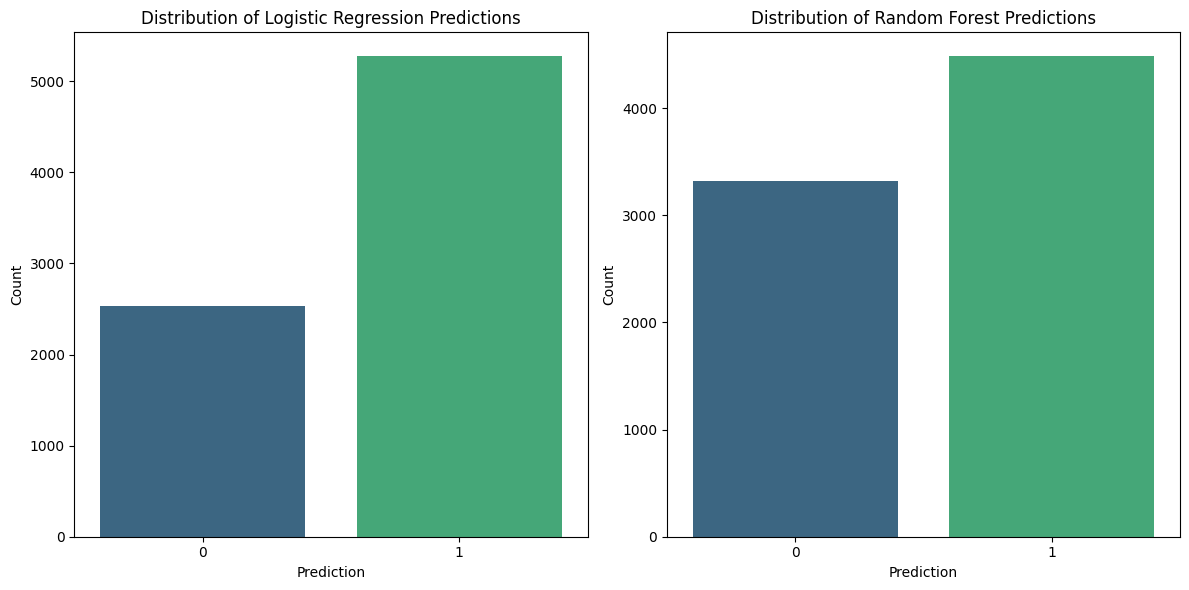

/var/folders/d5/skky3m813435ws6txfybb5780000gn/T/ipykernel_99980/2931767513.py:107: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(predictions_df['Logistic_Regression_Prediction'], shade=True, color='blue')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/d5/skky3m813435ws6txfybb5780000gn/T/ipykernel_99980/293176751

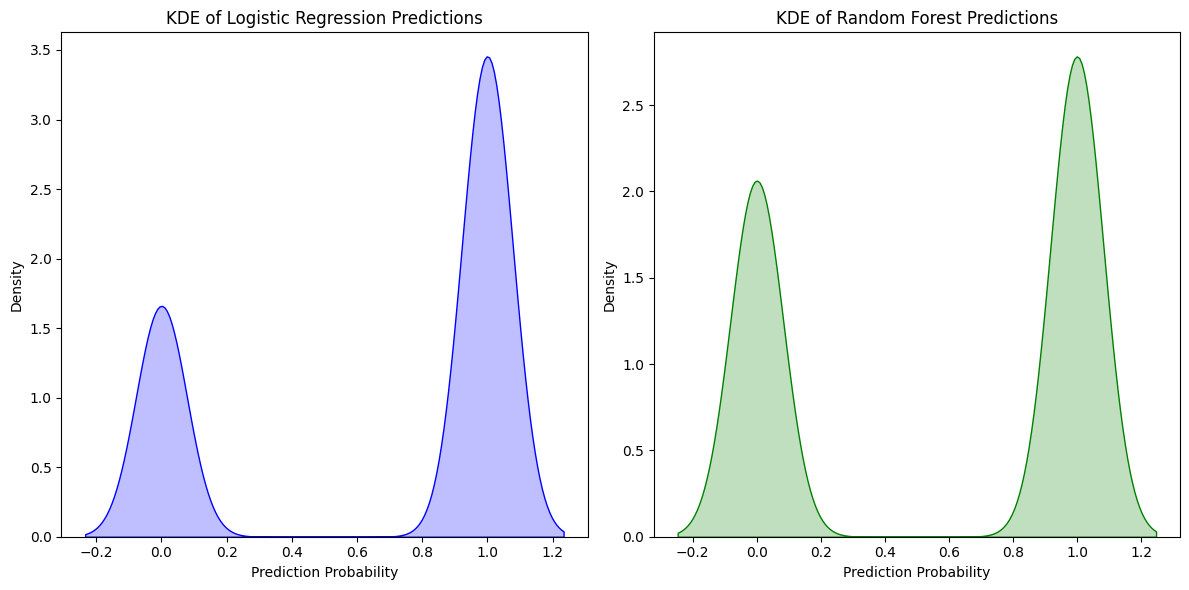

Descriptive Statistics for Predictions:
                                Count      Mean  Standard Deviation  Min  \
Logistic_Regression_Prediction   7807  0.675419            0.468248    0   
Random_Forest_Prediction         7807  0.574228            0.494491    0   

                                25th Percentile  Median  75th Percentile  Max  
Logistic_Regression_Prediction              0.0     1.0              1.0    1  
Random_Forest_Prediction                    0.0     1.0              1.0    1  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load cleaned datasets
train_path = '/Users/juliafangman/Documents/Capstone-Project-2024/cleaned_training_data.csv'
test_path = '/Users/juliafangman/Documents/Capstone-Project-2024/cleaned_test_data1.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Define target variable and feature columns
target = 'Recidivism_Within_3years'
features = [col for col in train_df.columns if col != target]

# Identify categorical columns
categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()
categorical_features = [col for col in categorical_features if col in features]

# Identify numerical columns
numerical_features = [col for col in features if col not in categorical_features]

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Create and fit model pipelines
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Separate features and target variable in training data
X_train = train_df[features]
y_train = train_df[target]

# Train models
log_reg_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

# Prepare test data
X_test = test_df[features]

# Predict on the test data
y_test_pred_log_reg = log_reg_pipeline.predict(X_test)
y_test_pred_rf = rf_pipeline.predict(X_test)

predictions_df = pd.DataFrame({
    'ID': test_df['ID'],  # Assuming 'ID' is a column to identify each row
    'Logistic_Regression_Prediction': y_test_pred_log_reg,
    'Random_Forest_Prediction': y_test_pred_rf
})

predictions_df.to_csv('/Users/juliafangman/Documents/Capstone-Project-2024/predictions.csv', index=False)
print("Predictions saved to 'predictions.csv'")

# Load predictions
predictions_path = '/Users/juliafangman/Documents/Capstone-Project-2024/predictions.csv'
predictions_df = pd.read_csv(predictions_path)

# Create a distribution plot for the predictions
plt.figure(figsize=(12, 6))

# Plot distribution of Logistic Regression predictions
plt.subplot(1, 2, 1)
sns.countplot(x='Logistic_Regression_Prediction', data=predictions_df, palette='viridis')
plt.title('Distribution of Logistic Regression Predictions')
plt.xlabel('Prediction')
plt.ylabel('Count')

# Plot distribution of Random Forest predictions
plt.subplot(1, 2, 2)
sns.countplot(x='Random_Forest_Prediction', data=predictions_df, palette='viridis')
plt.title('Distribution of Random Forest Predictions')
plt.xlabel('Prediction')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# KDE plot for Logistic Regression predictions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(predictions_df['Logistic_Regression_Prediction'], shade=True, color='blue')
plt.title('KDE of Logistic Regression Predictions')
plt.xlabel('Prediction Probability')
plt.ylabel('Density')

# KDE plot for Random Forest predictions
plt.subplot(1, 2, 2)
sns.kdeplot(predictions_df['Random_Forest_Prediction'], shade=True, color='green')
plt.title('KDE of Random Forest Predictions')
plt.xlabel('Prediction Probability')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Calculate descriptive statistics for predictions
descriptive_stats = pd.DataFrame({
    'Count': predictions_df[['Logistic_Regression_Prediction', 'Random_Forest_Prediction']].count(),
    'Mean': predictions_df[['Logistic_Regression_Prediction', 'Random_Forest_Prediction']].mean(),
    'Standard Deviation': predictions_df[['Logistic_Regression_Prediction', 'Random_Forest_Prediction']].std(),
    'Min': predictions_df[['Logistic_Regression_Prediction', 'Random_Forest_Prediction']].min(),
    '25th Percentile': predictions_df[['Logistic_Regression_Prediction', 'Random_Forest_Prediction']].quantile(0.25),
    'Median': predictions_df[['Logistic_Regression_Prediction', 'Random_Forest_Prediction']].median(),
    '75th Percentile': predictions_df[['Logistic_Regression_Prediction', 'Random_Forest_Prediction']].quantile(0.75),
    'Max': predictions_df[['Logistic_Regression_Prediction', 'Random_Forest_Prediction']].max()
})

# Print the descriptive statistics table
print("Descriptive Statistics for Predictions:")
print(descriptive_stats)
